In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

df=pd.read_csv("C:/Users/Hemanth kumar/Downloads/fake_news_dataset.csv")
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [5]:
df.tail()

,title,text,date,source,author,category,label
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake
19999,Offer chair cover senior born.,remain pressure glass me six senior though nor...,2024-01-24,Daily News,James Peterson,Health,fake


In [6]:
df.shape

(20000, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [13]:
df.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


In [15]:
df.isnull().sum()

title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

In [17]:
df['title']

0                      Foreign Democrat final.
1          To offer down resource great point.
2                 Himself church myself carry.
3                         You unit its should.
4         Billion believe employee summer how.
                         ...                  
19995                        House party born.
19996    Though nation people maybe price box.
19997          Yet exist with experience unit.
19998                 School wide itself item.
19999           Offer chair cover senior born.
Name: title, Length: 20000, dtype: object

In [19]:
df['title'].nunique()

20000

In [21]:
df['text']

0        more tax development both store agreement lawy...
1        probably guess western behind likely next inve...
2        them identify forward present success risk sev...
3        phone which item yard Republican safe where po...
4        wonder myself fact difficult course forget exa...
                               ...                        
19995    hit and television I change very our happy doo...
19996    fear most meet rock even sea value design stan...
19997    activity loss very provide eye west create wha...
19998    term point general common training watch respo...
19999    remain pressure glass me six senior though nor...
Name: text, Length: 20000, dtype: object

In [23]:
df['text'].nunique()

20000

In [25]:
df['date']

0        2023-03-10
1        2022-05-25
2        2022-09-01
3        2023-02-07
4        2023-04-03
            ...    
19995    2024-12-04
19996    2024-05-26
19997    2023-04-17
19998    2024-06-30
19999    2024-01-24
Name: date, Length: 20000, dtype: object

In [27]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.set_index('date', inplace=True)

In [29]:
df['source']

date
2023-03-10      NY Times
2022-05-25      Fox News
2022-09-01           CNN
2023-02-07       Reuters
2023-04-03           CNN
                 ...    
2024-12-04           BBC
2024-05-26    Daily News
2023-04-17           BBC
2024-06-30       Reuters
2024-01-24    Daily News
Name: source, Length: 20000, dtype: object

In [31]:
source_null=df[df['source'].isnull()]
source_null

,title,text,source,author,category,label
date,,,,,,
2023-10-19,Show technology product alone seem.,case three development painting team group let...,NaN,Nicole Baker,Entertainment,fake
2022-08-05,Organization total about garden attack.,race degree assume ball staff prepare others l...,NaN,Tonya Anderson,Business,real
2025-03-27,Risk describe fight clear else learn official.,reveal science popular suddenly sometimes qual...,NaN,Ian Rogers,Entertainment,real
2024-10-26,Fill business many culture find.,what production country even Mrs impact white ...,NaN,Megan Hernandez,Sports,real
2022-12-16,Play food note center customer.,use international ability open system medical ...,NaN,Bethany Garcia,Entertainment,fake
...,...,...,...,...,...,...
2024-12-12,Cover magazine indeed toward impact begin reme...,bag speak police but night box rather rise qui...,NaN,Jeff Mcintyre,Entertainment,fake
2024-11-06,Lot participant security person must west.,miss thousand student story risk else task tri...,NaN,Ashley Richardson,Business,real
2022-10-04,Remember lead concern loss pay form.,few name parent about relationship base protec...,NaN,Alex Coleman,Politics,fake


In [33]:
df['source']=df['source'].fillna(df['source'].mode()[0])

In [35]:
df['source']

date
2023-03-10      NY Times
2022-05-25      Fox News
2022-09-01           CNN
2023-02-07       Reuters
2023-04-03           CNN
                 ...    
2024-12-04           BBC
2024-05-26    Daily News
2023-04-17           BBC
2024-06-30       Reuters
2024-01-24    Daily News
Name: source, Length: 20000, dtype: object

In [37]:
df.isnull().sum()

title          0
text           0
source         0
author      1000
category       0
label          0
dtype: int64

In [39]:
df['author']

date
2023-03-10            Paula George
2022-05-25             Joseph Hill
2022-09-01          Julia Robinson
2023-02-07    Mr. David Foster DDS
2023-04-03           Austin Walker
                      ...         
2024-12-04              Gary Miles
2024-05-26           Maria Mcbride
2023-04-17        Kristen Franklin
2024-06-30              David Wise
2024-01-24          James Peterson
Name: author, Length: 20000, dtype: object

In [41]:
a_null=df[df['author'].isnull()]
a_null

,title,text,source,author,category,label
date,,,,,,
2024-04-18,Discover quite less option firm.,family century side really pattern door build ...,Fox News,NaN,Business,fake
2023-05-06,People box half of other building field decide.,site foreign personal character blood per film...,Fox News,NaN,Politics,fake
2023-06-05,Herself force member raise it religious.,any art difference city course fly modern occu...,Global Times,NaN,Sports,real
2022-05-10,Finish nearly five southern manage point work.,whatever nor conference respond large ago expe...,Global Times,NaN,Health,real
2024-04-01,Already amount safe prepare keep.,between tend surface coach score lawyer succes...,CNN,NaN,Technology,fake
...,...,...,...,...,...,...
2024-09-09,Big win image drop.,success sign scientist house him doctor when s...,Daily News,NaN,Politics,fake
2022-09-06,Upon line leg various everyone position every.,community kitchen boy town address site public...,Reuters,NaN,Politics,real
2024-05-12,It accept sell candidate generation skin.,popular site may approach party song approach ...,BBC,NaN,Politics,fake


In [43]:
df['author']=df['author'].fillna("No Author Available")

In [45]:
df['author']

date
2023-03-10            Paula George
2022-05-25             Joseph Hill
2022-09-01          Julia Robinson
2023-02-07    Mr. David Foster DDS
2023-04-03           Austin Walker
                      ...         
2024-12-04              Gary Miles
2024-05-26           Maria Mcbride
2023-04-17        Kristen Franklin
2024-06-30              David Wise
2024-01-24          James Peterson
Name: author, Length: 20000, dtype: object

In [47]:
df.isnull().sum()

title       0
text        0
source      0
author      0
category    0
label       0
dtype: int64

In [49]:
df['category']

date
2023-03-10         Politics
2022-05-25         Politics
2022-09-01         Business
2023-02-07          Science
2023-04-03       Technology
                  ...      
2024-12-04    Entertainment
2024-05-26    Entertainment
2023-04-17    Entertainment
2024-06-30           Health
2024-01-24           Health
Name: category, Length: 20000, dtype: object

In [51]:
df['label']

date
2023-03-10    real
2022-05-25    fake
2022-09-01    fake
2023-02-07    fake
2023-04-03    fake
              ... 
2024-12-04    fake
2024-05-26    real
2023-04-17    real
2024-06-30    fake
2024-01-24    fake
Name: label, Length: 20000, dtype: object

In [53]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_len'] = df['title'].apply(lambda x: len(str(x)))

## 1.Boxplot of Text Length by Label

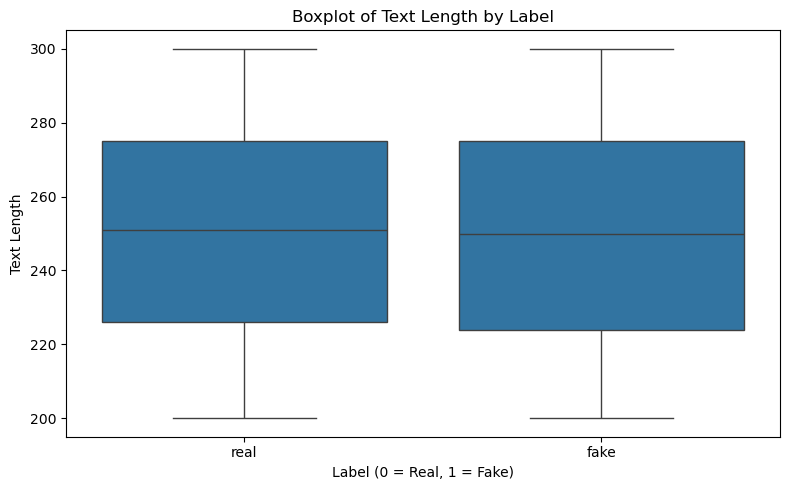

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_len', data=df)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Label (0 = Real, 1 = Fake)')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

## 2.Histogram of Text Lengths

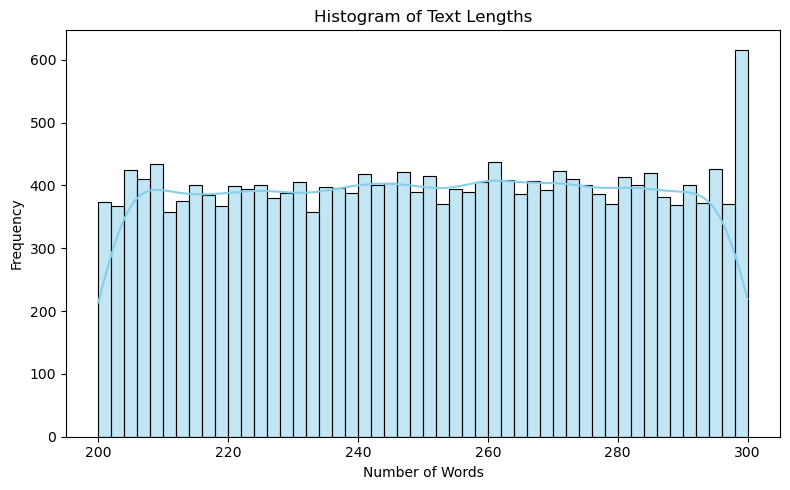

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(df['text_len'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

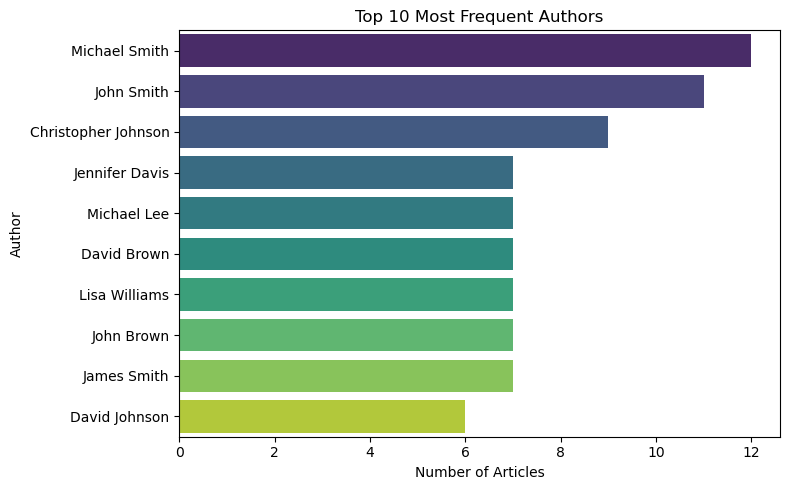

In [60]:
df_clean = df[df['author'] != 'No Author Available']
top_authors = df_clean['author'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_authors.values, y=top_authors.index,hue=top_authors.index, palette='viridis')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


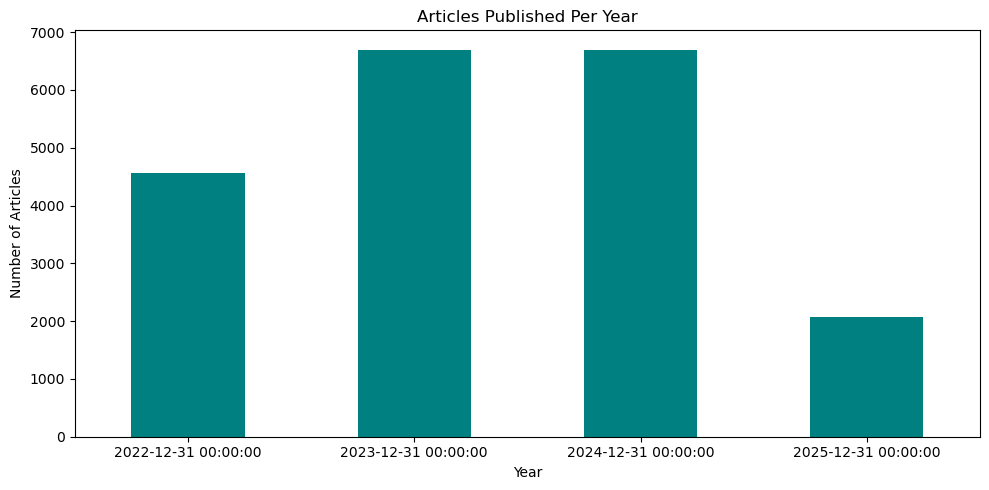

In [61]:
yearly_counts = df.resample('YE').size()
plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='bar', color='teal')
plt.title('Articles Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Final Conclusions:

1. Boxplot of Text Length by Label
  
  The distribution of article lengths varies significantly between real (0) and
fake (1) news.

  Fake news articles tend to have shorter text lengths, suggesting that they may prioritize sensationalism over substance.


2. Histogram of Text Lengths

  The majority of articles fall within a moderate range of text length (e.g., 100 to 500 words).

  A small number of articles are exceptionally long, possibly in-depth reports or opinion pieces.


3. Top 10 Most Frequent Authors

  A handful of authors contribute a large number of articles, indicating a skewed distribution.

  These frequent authors could be automated bots, prominent journalists, or syndicated sources.


4. Articles Published Per Year

  There is fluctuation in article publication volume over the years.

  Specific years show spikes, possibly due to major global events or elections.


